Fabian Brock - Case 2

i6248959

I am sick so I might not be able to join the Friday tutorial in person (I will do my best to join on Zoom).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# functions from case 1
import utils
import scipy.stats as stats

I retyped this in jupyter (which was very painful, I hope it is worth it)

$\frac{O_s}{B_s} = \mathbb{E}( \frac{O_s}{B_s} | F_s)$ &nbsp;    Joshi 6.69
$O_0 = \frac{B_0}{B_t} \mathbb{E}[max(S_t, 100)]$ &nbsp;    Joshi 6.70
$S_t = S_0 * exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}N(0,1))$ &nbsp;    Joshi 6.71\
$\ $
Inserting 6.71 into 6.70 gives us:
$\ $
$O_0 = \frac{B_0}{B_t} \mathbb{E}[max(S_0 * exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}N(0,1)), 100)]$
$B_t = B_0 * exp(rt) => \frac{B_0}{B_t} = \frac{B_0}{B_0 * e^{rt}} = e^{-rt}$\
$\ $
Insert density of $N(0,1)$ into $O_0$ and we get:
$\ $
$O_0 = \frac{e^{-rt}}{\sqrt{2\pi}} * \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} max(S_0 * exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}x), 100) dx$\
$\ $
Now determine when the max function is 100 and when it is $S_0 * exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}x)$\
I skipped over a few steps (for sanity):
$\ $
$x \ge \frac{ln(frac{100}{S_0}-rt + \frac{1}{2}\sigma^2t}{\sigma\sqrt{t}} = l$\
$\ $
Now we can split the integral into two parts:
$\ $
$\frac{e^{-rt}}{\sqrt{2\pi}} \ \int_{-\infty}^{l} e^{-\frac{x^2}{2}} * 100\ dx  \ + \int_{l}^{\infty} S_0 \ e^{-\frac{x^2}{2}} \ exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}x) \ dx$

Evaluating the first integral multiplied by the fraction gives us this:
$\ $
$\frac{e^{-rt}}{\sqrt{2\pi}} \ \int_{-\infty}^{l} e^{-\frac{x^2}{2}}$
$ \ $
Considering that the integral from $-\infty$ to l of the density of $N(0,1)$ l, this gives us:
$ \ $
$100e^{-rt} N(d_1)$
$ \ $
Where $d_1 = \frac{ln(\frac{100}{S_0}-rt + \frac{1}{2}\sigma^2t}{\sigma\sqrt{t}}$ and N(x) is the integral divided by sqrt(2pi)

Now consider the second integral:
$\ $
$\frac{e^{-rt}}{\sqrt{2\pi}} \ \int_{l}^{\infty} S_0 \ e^{-\frac{x^2}{2}} \ exp((r-\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}x) \ dx$
$\ $
We can use a trick namely setting $x = \tilde{x} + \sigma \sqrt{t}$ and then we get (after skipping the cancellation steps):
$\ $
$S_0 \ \frac{1}{\sqrt{2\pi}} \int_{l-\sigma\sqrt{t}}^{\infty} exp(-\frac{\tilde{x}^2}{2}) \ d\tilde{x}$
$\ $
And by symmetry of the density from $l-\sigma\sqrt{t}$ to $\infty$ and $-l+\sigma\sqrt{t}$ to $-\infty$ we get:
$\ $
$S_0N(d_2)$


So now we have:
$\ $
$O_0 = 100e^{-rt} N(d_1) + S_0N(d_2)$ where
$\ $
$d_1 = \frac{ln(\frac{100}{S_0})-rt + \frac{1}{2}\sigma^2t}{\sigma\sqrt{t}}$
$\ $
$d_2 = \frac{ln(\frac{S_0}{100})+rt + \frac{1}{2}\sigma^2t}{\sigma\sqrt{t}}$
$\ $
Plugging in all the values $r = 1\%,\ \sigma=15\%,\ T=10,\ S_0=100$
We get:
$\ $
$d_1 = 0.026352$
$d_2 = 0.447984$
$\ $
$N(d_1) = 0.5105$
$N(d_2) = 0.6729$
$\ $
$O_0 = 100e^{-0.01*10} * 0.5105 + 100 * 0.6729 = 113.481950$
$\ $
So the analytical price is 113.481950 which matches the value attained in case 1 with the binomial tree

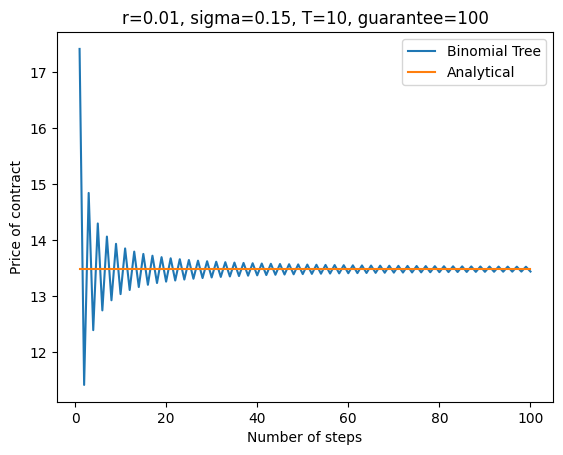

In [2]:
analytical = 13.481950
r = 0.01
sigma = 0.15
T = 10
guarantee = 100
n = 100 # number of steps
utils.plot_price(r,sigma,T,guarantee, n=100, pricing=utils.price_contract, analytical=analytical)

In [3]:
ts = np.arange(0,T, 0.01)
S1 = np.arange(50,150,0.1)
S2 = np.arange(150,50,-0.1)

def d1(S, t, T, r, sigma):
    return ( np.log(S/100) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))

def d2(S, t, T, r, sigma):
    return (np.log(100/S)- (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))


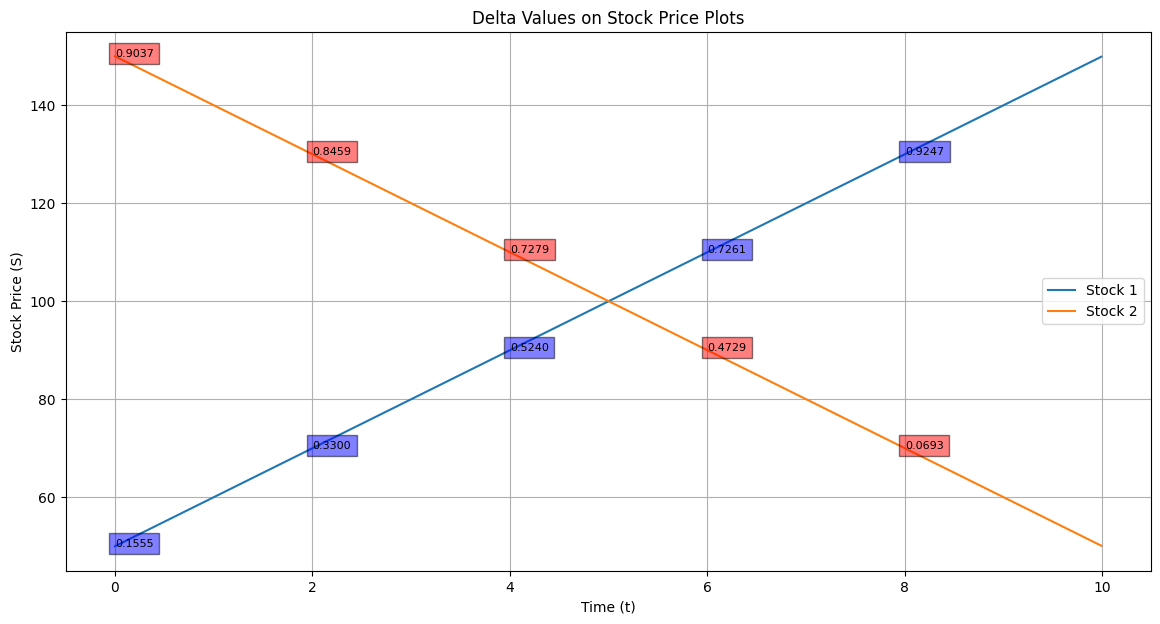

In [4]:
ts = np.arange(0, T, 0.01)
S1 = np.arange(50, 150, 0.1)
S2 = np.arange(150, 50, -0.1)

# Plot the graph for stock 1 and 2
plt.figure(figsize=(14, 7))
plt.plot(ts, S1, label='Stock 1')
plt.plot(ts, S2, label='Stock 2')

# Adding textboxes every 2 steps in ts
for i in range(0, len(ts), 200):  # Every 2 steps (0.01 * 200 = 2)
    t = ts[i]
    S1_value = S1[i]
    delta_S1 = stats.norm.cdf(d1(S1_value, t, 10, r, sigma))
    plt.text(t, S1_value, f'{delta_S1:.4f}', fontsize=8, bbox=dict(facecolor='blue', alpha=0.5))

for i in range(0, len(ts), 200):
    t = ts[i]
    S2_value = S2[i]
    delta_S2 = stats.norm.cdf(d1(S2_value, t, 10, r, sigma))
    plt.text(t, S2_value, f'{delta_S2:.4f}', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.xlabel('Time (t)')
plt.ylabel('Stock Price (S)')
plt.title('Delta Values on Stock Price Plots')
plt.legend()
plt.grid(True)
plt.show()


The delta looks like it behaves correctly, so I added it to the price contract function from case 1. Not in the notebook to save some space :)

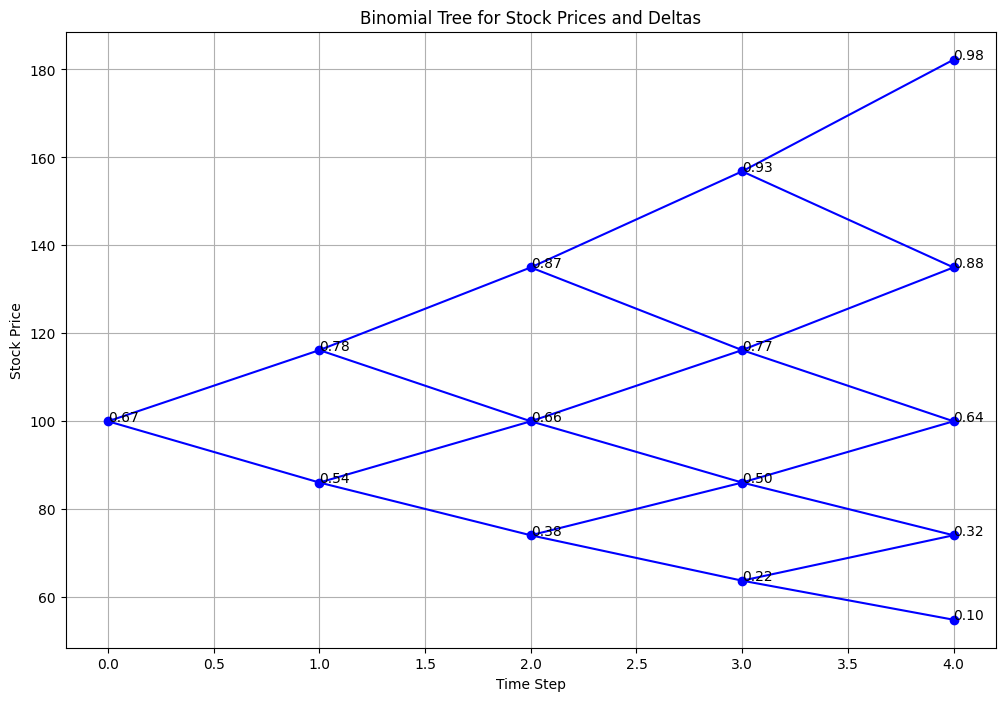

In [5]:
# Calculate the binomial tree for stock, option price and delta
stock_prices, option_prices, deltas = utils.price_contract_with_delta(r, sigma, T, guarantee, 10, 100)

# Adjust the function to correct the delta calculation, ensuring they are not negative
def plot_binomial_tree(stock_prices, deltas, n):
    plt.figure(figsize=(12, 8))
    for i in range(n + 1):
        for j in range(i + 1):
            # stock prices
            plt.plot(i, stock_prices[i, j], 'bo')
            # lines
            if i < n:  # no lines from the last nodes
                plt.plot([i, i + 1], [stock_prices[i, j], stock_prices[i + 1, j]], 'b-')
                plt.plot([i, i + 1], [stock_prices[i, j], stock_prices[i + 1, j + 1]], 'b-')


            delta_val = deltas[i, j]
            plt.annotate(f"{delta_val:.2f}", (i, (stock_prices[i, j])))

    plt.title("Binomial Tree for Stock Prices and Deltas")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

# Plot the binomial tree and deltas
plot_binomial_tree(stock_prices, deltas, 4)